In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('data/Top_Influencers.csv', encoding_errors='ignore')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [3]:
# need to preprocess some columns - convert to integers
cols_for_num = ['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes', 'Total Likes']

for col in cols_for_num:
    for i in range(len(df[col])):
       if str(df[col][i])[-1:]=='k':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00'
       elif str(df[col][i])[-1:]=='m':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00000'
       elif str(df[col][i])[-1:]=='b':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00000000'
       else:
            df[col][i] = str(df[col][i])

for col in cols_for_num:
     df[col] = pd.to_numeric(df[col], errors='coerce')

df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
181,182,\ntoni.krs,83,35600000,597800,946,0.012,432500,565500000,NaN
97,98,\nhudabeauty,82,51200000,180900,2400,0.001,40900,442200000,United States
165,166,\nrkive,83,38400000,10600000,115,0.171,6500000,1200000000,NaN
107,108,\ngucci,86,49100000,115100,9000,0.001,72400,1000000000,Italy
32,33,\nbillieeilish,73,106400000,8400000,710,0.047,4900000,6000000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    int64  
 4   Avg. Likes           200 non-null    int64  
 5   Posts                200 non-null    int64  
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    int64  
 8   Total Likes          200 non-null    int64  
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 15.8+ KB


['Spain' 'United States' nan 'Canada' 'Brazil' 'Netherlands'
 'United Kingdom' 'India' 'Uruguay' 'Turkey' 'Indonesia' 'Colombia'
 'France' 'Australia' 'Italy' 'United Arab Emirates' 'Puerto Rico'
 "Côte d'Ivoire" 'Anguilla' 'Switzerland' 'Sweden'
 'British Virgin Islands' 'Czech Republic' 'Mexico' 'Germany' 'Russia']
63
137


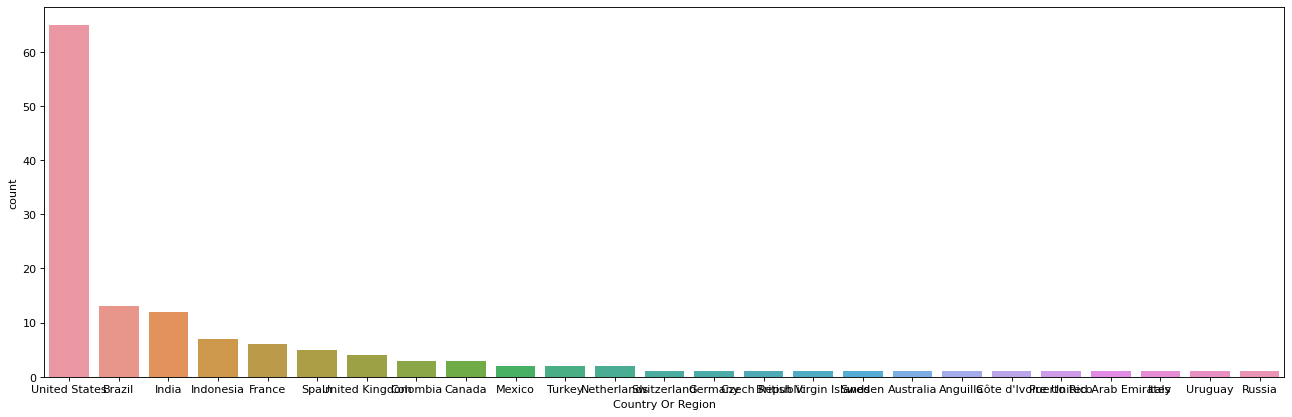

In [5]:
#Country or origin variable has missing values
plt.figure(figsize=(20, 6), dpi=80)
sns.countplot(x='Country Or Region', data=df, order = df['Country Or Region'].value_counts().index)
print(df['Country Or Region'].unique())
print(len(df[df['Country Or Region'].isnull()]))
print(len(df[~df['Country Or Region'].isnull()]))

In [6]:
df[df['Country Or Region'].isnull()].head(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
2,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6100000000,NaN
15,16,\nvirat.kohli,87,215900000,3500000,1400,0.013,2700000,5000000000,NaN
18,19,\nmileycyrus,89,183600000,1300000,1200,0.004,702400,1600000000,NaN
20,21,\nkatyperry,92,173300000,714800,2100,0.002,302900,1500000000,NaN
26,27,\nkingjames,86,133700000,2100000,2400,0.008,1000000,4900000000,NaN


In [7]:
# we see that Country doesnt play a key role of ranking (the Rank 3 for example doesnt have it filled - Messi)
print("Highest rank is {}".format(df[df['Country Or Region'].isnull()]['Rank'].min()))

Highest rank is 3


In [8]:
# fill blan countries with 'Missing' text
df['Country Or Region'] = df['Country Or Region'].fillna('Missing Country')
df['Country Or Region'].value_counts()

United States             65
Missing Country           63
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
Côte d'Ivoire              1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country Or Region, dtype: int64

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,81.85,78491000.00,1785050.00,3460.43,0.02,1224083.00,3644949000.00
std,57.88,8.88,74920154.61,2192133.48,3327.88,0.03,1857624.20,5563069303.62
min,1.00,22.00,33400000.00,63500.00,20.00,0.00,0.00,22800000.00
25%,50.75,80.00,40675000.00,499050.00,938.25,0.00,218775.00,1075000000.00
50%,100.50,84.00,50950000.00,1100000.00,2100.00,0.01,567150.00,2050000000.00
75%,150.25,86.00,70500000.00,2125000.00,5025.00,0.02,1300000.00,4025000000.00
max,200.00,93.00,485200000.00,15400000.00,16900.00,0.25,12900000.00,57400000000.00


<AxesSubplot: >

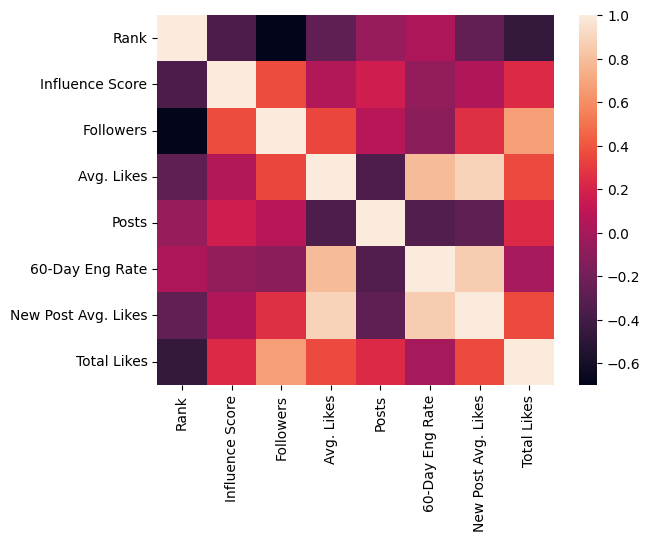

In [10]:
# rank is highly corelated with followers, total and average likes. Post numbers and 60d ER is not affecting the rank that much
sns.heatmap(df.corr())

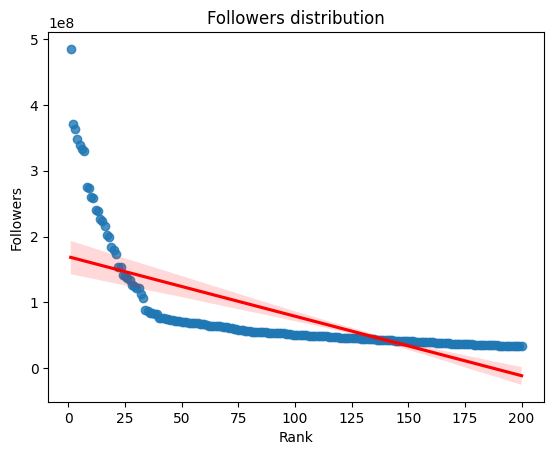

Followers Mean: 78491000.0
Followers Median: 50950000.0


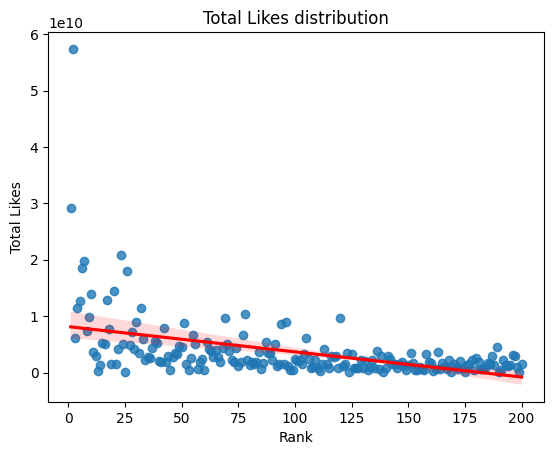

Total Likes Mean: 3644949000.0
Total Likes Median: 2050000000.0


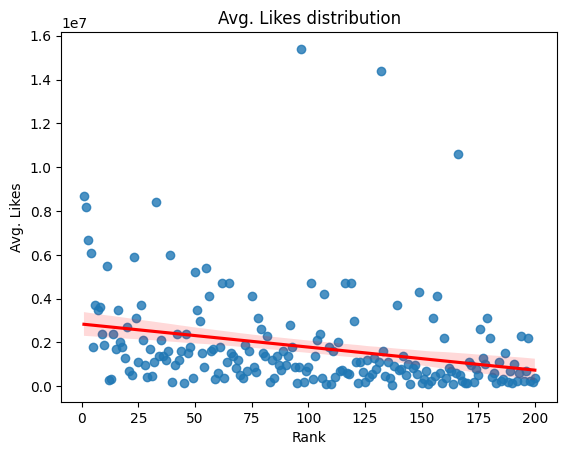

Avg. Likes Mean: 1785050.0
Avg. Likes Median: 1100000.0


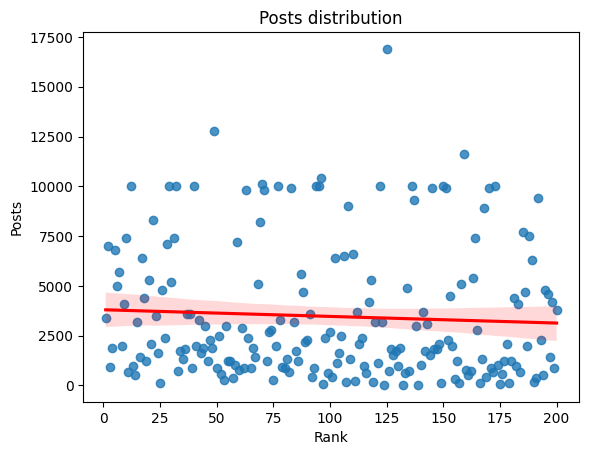

Posts Mean: 3460.425
Posts Median: 2100.0


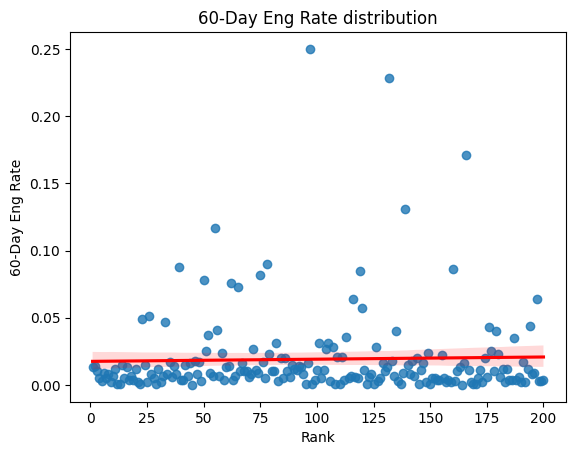

60-Day Eng Rate Mean: 0.019160000000000003
60-Day Eng Rate Median: 0.0095


In [11]:
# lets plot those features as scatter vs the rank
for feature in ['Followers', 'Total Likes', 'Avg. Likes', 'Posts', '60-Day Eng Rate' ]:
    data = df.copy()
    plt.title(feature + ' distribution')
    plot = sns.regplot(x=data['Rank'], y=data[feature], line_kws={"color": "red"})
    plt.show()
    print(feature+" Mean: {}".format(data[feature].mean()))
    print(feature+" Median: {}".format(data[feature].median()))


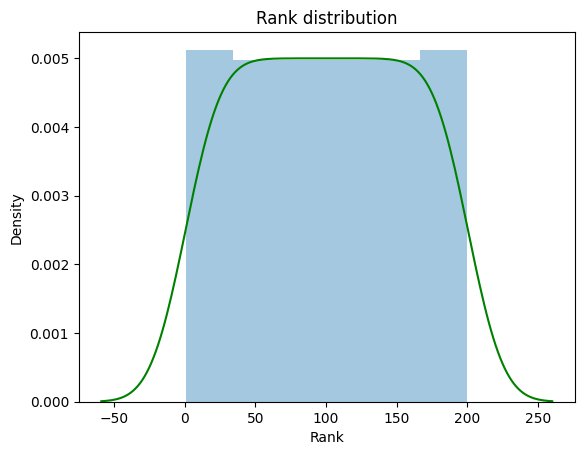

Rank Mean: 100.5
Rank Median: 100.5


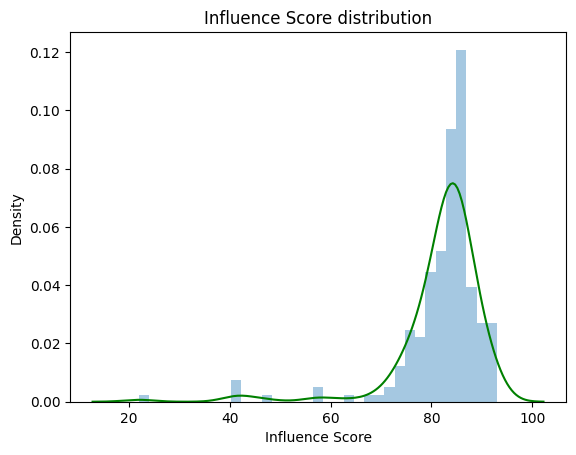

Influence Score Mean: 81.85
Influence Score Median: 84.0


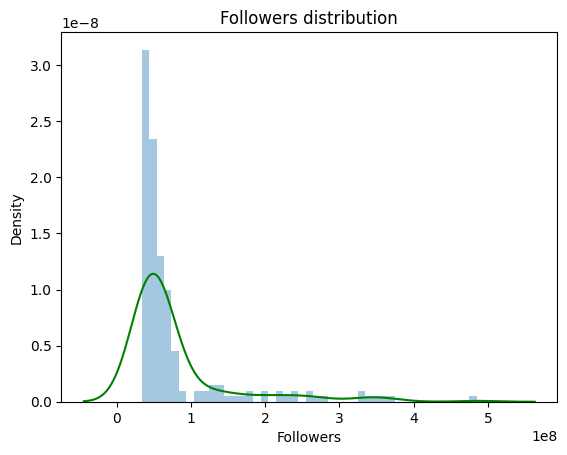

Followers Mean: 78491000.0
Followers Median: 50950000.0


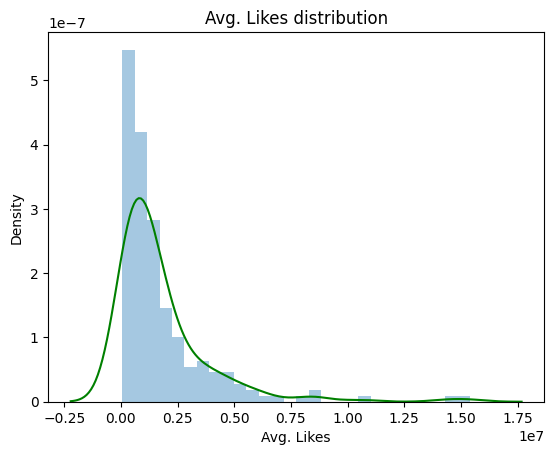

Avg. Likes Mean: 1785050.0
Avg. Likes Median: 1100000.0


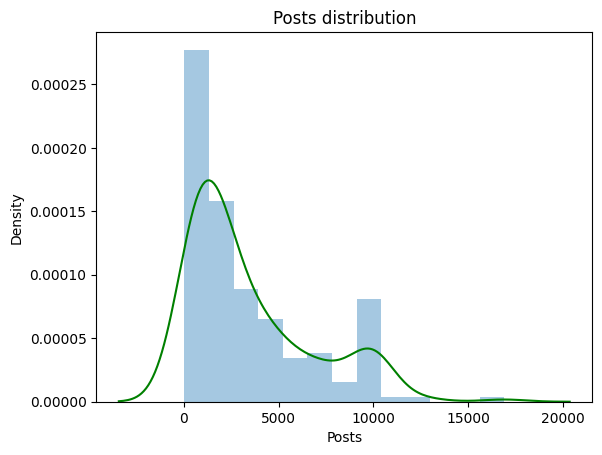

Posts Mean: 3460.425
Posts Median: 2100.0


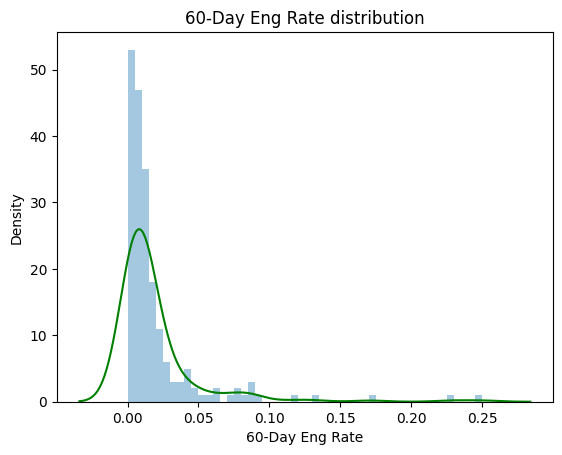

60-Day Eng Rate Mean: 0.019160000000000003
60-Day Eng Rate Median: 0.0095


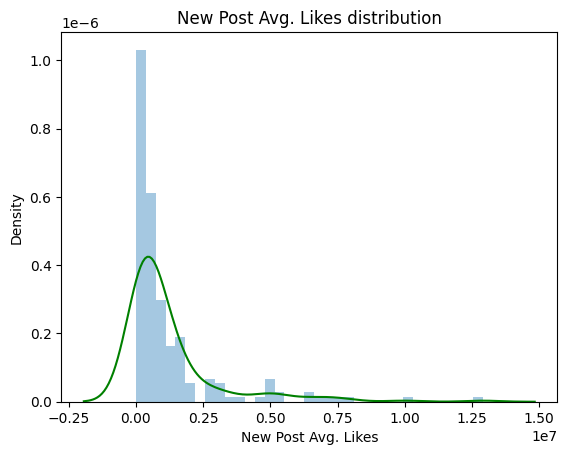

New Post Avg. Likes Mean: 1224083.0
New Post Avg. Likes Median: 567150.0


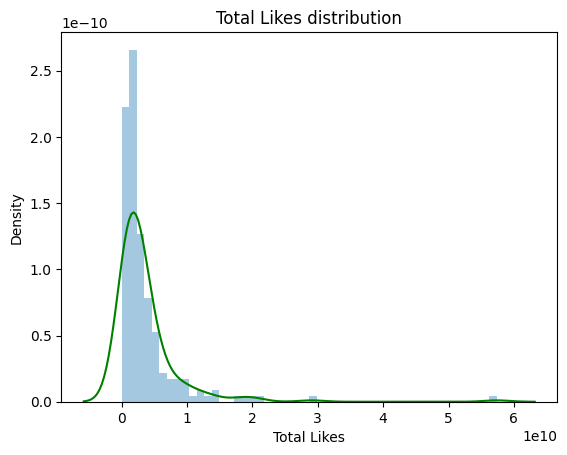

Total Likes Mean: 3644949000.0
Total Likes Median: 2050000000.0


In [12]:
#checking distribution of numeric features
for feature in [ col for col in df.columns if df[col].dtypes != "O"]:
    data = df.copy()
    plt.title(feature + ' distribution')
    plot = sns.distplot(data[feature], kde_kws={"color": "green"})
    plt.show()
    print(feature+" Mean: {}".format(data[feature].mean()))
    print(feature+" Median: {}".format(data[feature].median()))

# Distribution of numeric variables takeouts
- Rank - just a range of numbers - distribution is clear;
- Influencescore - left skewed, mean and median are close;
- Followers - right skewed, mean is ~56% higher than median;
- Avg Likes - right skewed, mean is ~61% higher than median;
- Posts - right skewed, mean is ~64% higher than median;
- 60 DER - right skewed, mean is ~ 2 times higher than median;
- New Posts avg likes - right skewed, mean is ~ 2 times higher than median;
- Total Likes - right skewed, mean is ~77% higher than median;

# Clustering blogers into groups

In [13]:
# let's drop the chanel name and rank column as it's most likely made based on other features and encode Country column
X = df.drop(['Channel Info','Rank'], axis=1)
X['Country Or Region'] = LabelEncoder().fit_transform(X['Country Or Region'])

#and scale the data
scaler = MinMaxScaler()
for col in ['Influence Score', 'Followers',	 'Avg. Likes', 'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes']:
    X = X.copy()
    X[col] = scaler.fit_transform(np.array(X[col]).reshape(-1,1))
X


,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,0.99,1.00,0.56,0.20,0.05,0.49,0.51,18
1,0.97,0.75,0.53,0.41,0.06,0.39,1.00,24
2,0.96,0.73,0.43,0.05,0.04,0.27,0.11,14
3,1.00,0.70,0.39,0.11,0.02,0.13,0.20,24
4,0.97,0.68,0.11,0.40,0.01,0.07,0.22,24
...,...,...,...,...,...,...,...,...
195,0.58,0.00,0.04,0.27,0.04,0.02,0.05,17
196,0.87,0.00,0.14,0.08,0.26,0.16,0.05,4
197,0.82,0.00,0.01,0.25,0.01,0.01,0.02,11
198,0.80,0.00,0.01,0.05,0.01,0.01,0.00,2


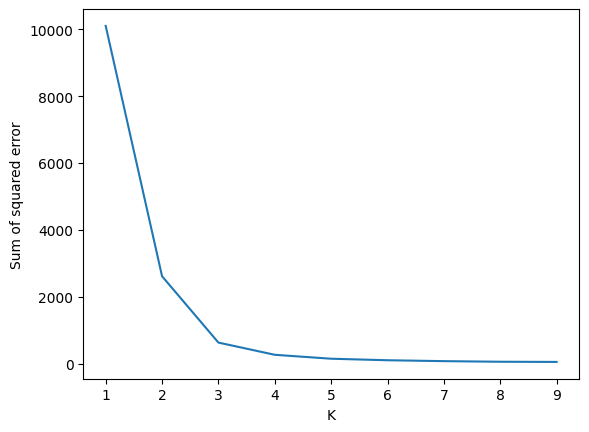

In [14]:
#creating "elbow data" to estimate the number of N clusters
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

#ploting a label, making sure it's 2
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [15]:
# let's proceed with n_cluster= 3 parameter
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(X)
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,cluster
0,1,\ncristiano,92,485200000,8700000,3400,0.01,6300000,29100000000,Spain,2
1,2,kyliejenner,91,370700000,8200000,7000,0.01,5000000,57400000000,United States,0
2,3,\nleomessi,90,363900000,6700000,915,0.01,3500000,6100000000,Missing Country,2
3,4,\nselenagomez,93,348800000,6100000,1900,0.01,1700000,11400000000,United States,0
4,5,\ntherock,91,339400000,1800000,6800,0.00,932000,12600000000,United States,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000,680600,4600,0.01,305700,3100000000,Russia,2
196,197,\ndanbilzerian,84,33600000,2200000,1400,0.06,2100000,3000000000,Canada,1
197,198,\nraisa6690,80,33600000,227800,4200,0.00,103200,955900000,Indonesia,2
198,199,\nluansantana,79,33500000,193300,865,0.00,82600,167200000,Brazil,1


Text(0, 0.5, 'No of bloggers')

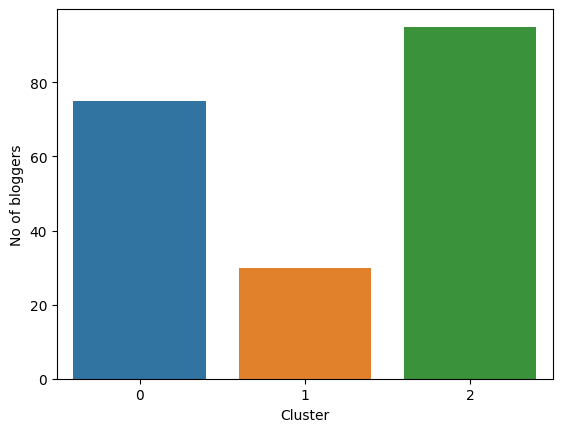

In [16]:
sns.countplot(x='cluster', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of bloggers')

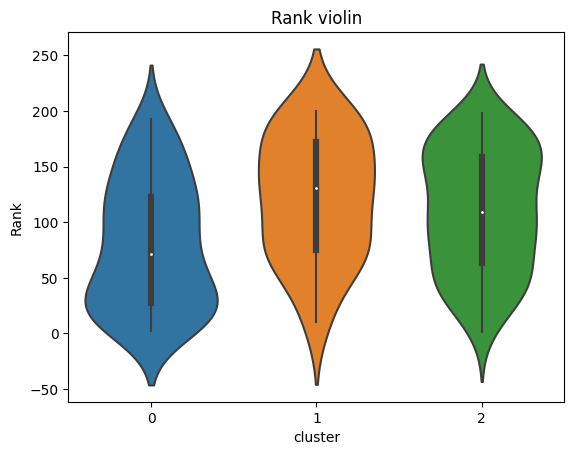

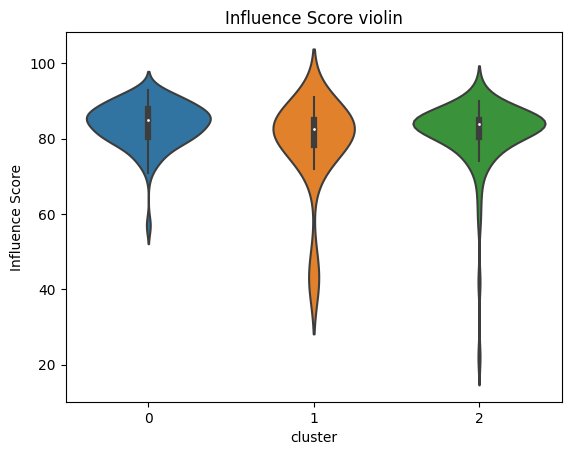

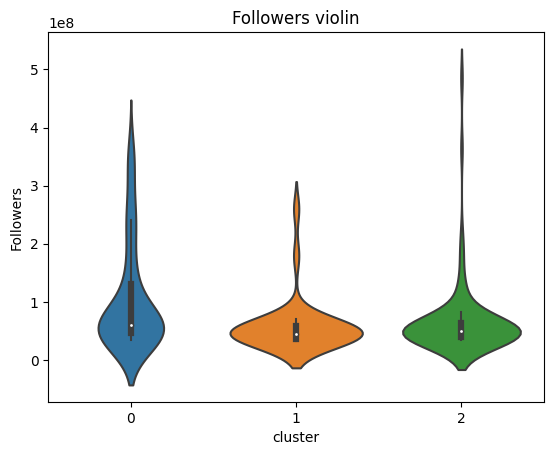

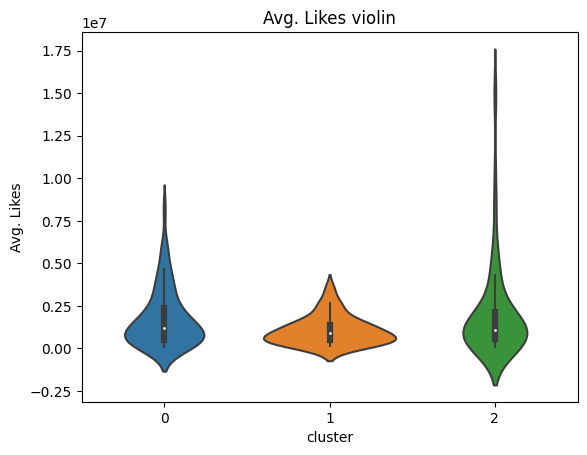

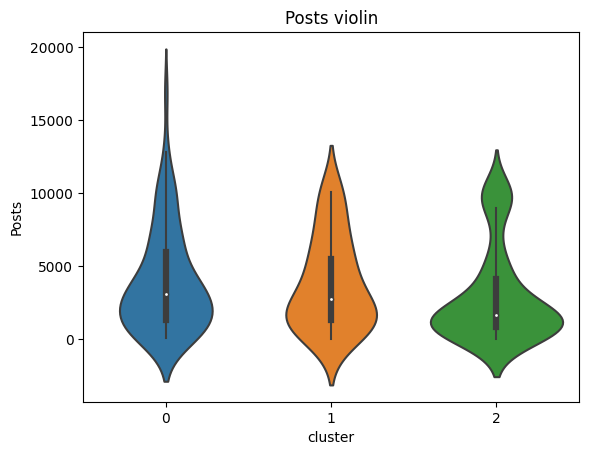

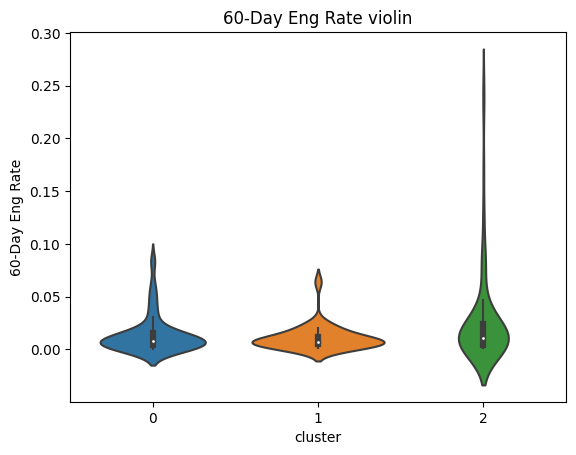

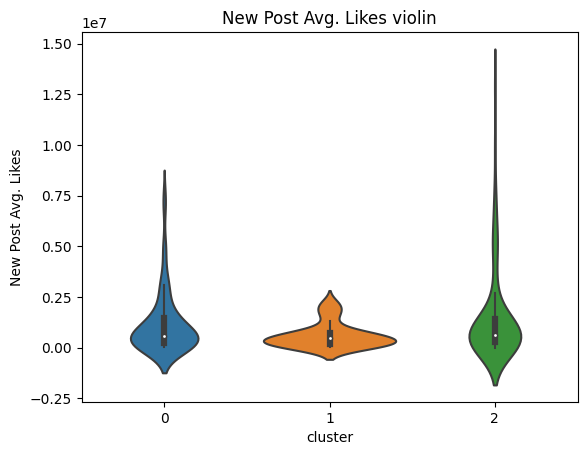

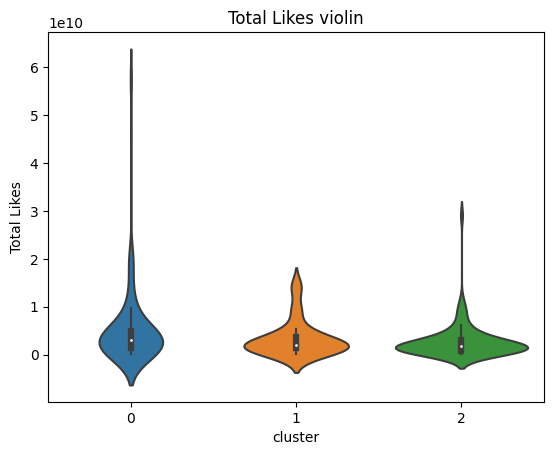

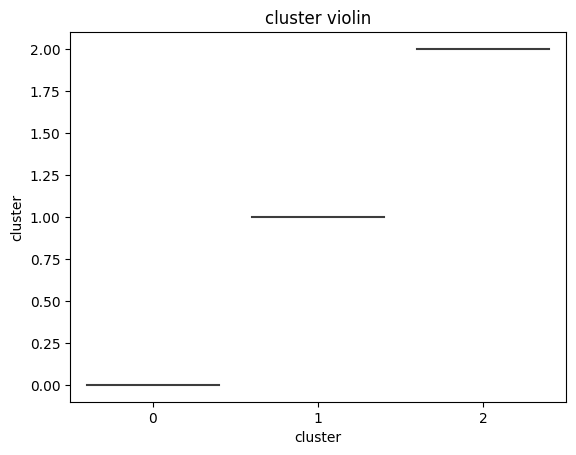

In [17]:
# lets discover a bit more the features by cluster

for feature in [ col for col in df.columns if df[col].dtypes != "O"]:
    data = df.copy()
    plt.title(feature + ' violin')
    plot = sns.violinplot(x='cluster', y=feature, data=df)
    plt.show()